## **COMPARISON REGRESSION IN PREDICTION MODEL OF SENGGURUH DAM DISCHARGE**
---

### **Abstrak**<br>

Sengguruh Dam plays a crucial role in water resource management, particularly for hydropower, irrigation, and flood control. This study analyzes its discharge using Linear Regression, Random Forest Regression, Support Vector Regression, and Polynomial Regression. Model performance is evaluated using R², MAE, RMSE, and MAPE.

Results show that Polynomial Regression performs best with R² = 0.5261, RMSE = 17.9083 m³/s, and MAPE = 23.53%, while Random Forest Regression has the highest error (RMSE = 19.1793 m³/s, MAPE = 28.43%). These findings suggest that polynomial regression is more suitable for discharge estimation. Future studies should incorporate additional parameters, such as evapotranspiration and water level, base flow, etc. to improve accuracy. <br>

**Keywords:** Dam Discharge, Hydrological Modeling, Regression, Machine Learning

# **Stage 1. Data Collection**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [639]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/00 Belajar Machine Learning/03 Power Generation Sutami/dataset_sutami_sengguruh_power.csv')
df

,date,avg_inflow,turbine_flow,spillway_flow,gate_flow,hjv_flow,rr_sengguruh,rr_sutami,rr_wagir,rr_dampit,total_energy,awlr_sengguruh
0,01/01/19,56.02,52.50,0.0,0.0,0.0,12,2,3.2,15.2,812.0,0
1,02/01/19,75.69,49.96,0.0,0.0,0.0,0,0,9.8,0,780.8,0
2,03/01/19,81.47,62.13,0.0,0.0,0.0,2,3,4,0,966.6,0
3,04/01/19,61.39,55.76,0.0,0.0,0.0,0,5,0,0,867.6,0
4,05/01/19,60.29,41.72,0.0,0.0,0.0,5,2,0.2,0,649.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1821,27/12/23,61.42,46.38,0.0,0.0,0.0,-,-,-,-,704.2,-
1822,28/12/23,76.99,49.38,0.0,0.0,0.0,-,-,-,-,751.2,-
1823,29/12/23,73.13,46.33,0.0,0.0,0.0,-,-,-,-,708.4,-
1824,30/12/23,79.14,46.74,0.0,0.0,0.0,-,-,-,-,715.9,-


# **Stage 2. Data Preprocessing**

In [640]:
df_variable = df.drop(columns=['avg_inflow','turbine_flow','spillway_flow','gate_flow','hjv_flow','total_energy','rr_sutami'])

In [641]:
df_variable

,date,rr_sengguruh,rr_wagir,rr_dampit,awlr_sengguruh
0,01/01/19,12,3.2,15.2,0
1,02/01/19,0,9.8,0,0
2,03/01/19,2,4,0,0
3,04/01/19,0,0,0,0
4,05/01/19,5,0.2,0,0
...,...,...,...,...,...
1821,27/12/23,-,-,-,-
1822,28/12/23,-,-,-,-
1823,29/12/23,-,-,-,-
1824,30/12/23,-,-,-,-


In [642]:
df_variable = df_variable.replace(("-"or"***"),np.nan)
df_clean = df_variable.dropna()
df_clean

,date,rr_sengguruh,rr_wagir,rr_dampit,awlr_sengguruh
0,01/01/19,12,3.2,15.2,0
1,02/01/19,0,9.8,0,0
2,03/01/19,2,4,0,0
3,04/01/19,0,0,0,0
4,05/01/19,5,0.2,0,0
...,...,...,...,...,...
1766,02/11/23,0,0,0,17.63
1767,03/11/23,0,0.4,3.4,14.39
1768,04/11/23,0,12.6,2.4,52.21
1769,05/11/23,0,0,0,43.19


In [643]:
print(df_clean.dtypes)
df_clean['rr_sengguruh'] = pd.to_numeric(df_clean['rr_sengguruh'], errors='coerce')
df_clean['rr_wagir'] = pd.to_numeric(df_clean['rr_wagir'], errors='coerce')
df_clean['rr_dampit'] = pd.to_numeric(df_clean['rr_dampit'], errors='coerce')
df_clean['awlr_sengguruh'] = pd.to_numeric(df_clean['awlr_sengguruh'], errors='coerce')
df_clean = df_clean.dropna()
df_clean

date              object
rr_sengguruh      object
rr_wagir          object
rr_dampit         object
awlr_sengguruh    object
dtype: object


<ipython-input-643-aebbc62b696b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rr_sengguruh'] = pd.to_numeric(df_clean['rr_sengguruh'], errors='coerce')
<ipython-input-643-aebbc62b696b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rr_wagir'] = pd.to_numeric(df_clean['rr_wagir'], errors='coerce')
<ipython-input-643-aebbc62b696b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,date,rr_sengguruh,rr_wagir,rr_dampit,awlr_sengguruh
0,01/01/19,12.0,3.2,15.2,0.00
1,02/01/19,0.0,9.8,0.0,0.00
2,03/01/19,2.0,4.0,0.0,0.00
3,04/01/19,0.0,0.0,0.0,0.00
4,05/01/19,5.0,0.2,0.0,0.00
...,...,...,...,...,...
1766,02/11/23,0.0,0.0,0.0,17.63
1767,03/11/23,0.0,0.4,3.4,14.39
1768,04/11/23,0.0,12.6,2.4,52.21
1769,05/11/23,0.0,0.0,0.0,43.19


In [644]:
# Konversi kolom 'date' menjadi datetime
df_clean = df_clean.copy()
df_clean['date'] = pd.to_datetime(df_clean['date'], format='%d/%m/%y')

# Set 'date' sebagai index
df_clean.set_index('date', inplace=True)

df_14d = df_clean.resample('14D').agg({
    'rr_sengguruh': 'sum',   # Total curah hujan dalam 14 hari
    'rr_wagir': 'sum',
    'rr_dampit': 'sum',
    'awlr_sengguruh': 'mean'  # Rata-rata tinggi muka air dalam 14 hari
})

# Reset index agar date kembali sebagai kolom
df_14d = df_14d.reset_index()

# Tampilkan hasil
df_14d

,date,rr_sengguruh,rr_wagir,rr_dampit,awlr_sengguruh
0,2019-01-01,26.0,121.4,64.6,0.000000
1,2019-01-15,164.0,146.8,179.6,0.000000
2,2019-01-29,123.0,415.4,30.0,0.000000
3,2019-02-12,65.0,139.4,254.2,1.494286
4,2019-02-26,43.0,115.0,153.0,0.465714
...,...,...,...,...,...
122,2023-09-05,0.0,0.2,0.0,24.401667
123,2023-09-19,0.0,0.0,0.4,21.527857
124,2023-10-03,0.0,0.8,0.0,19.856429
125,2023-10-17,12.0,7.0,0.2,20.215385


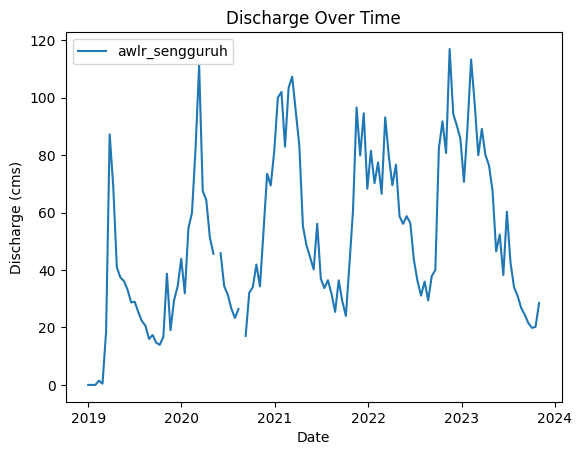

In [645]:
plt.plot(df_14d['date'], df_14d['awlr_sengguruh'],label='awlr_sengguruh')
plt.xlabel('Date')
plt.ylabel('Discharge (cms)')
plt.title('Discharge Over Time')
plt.legend()
plt.show()

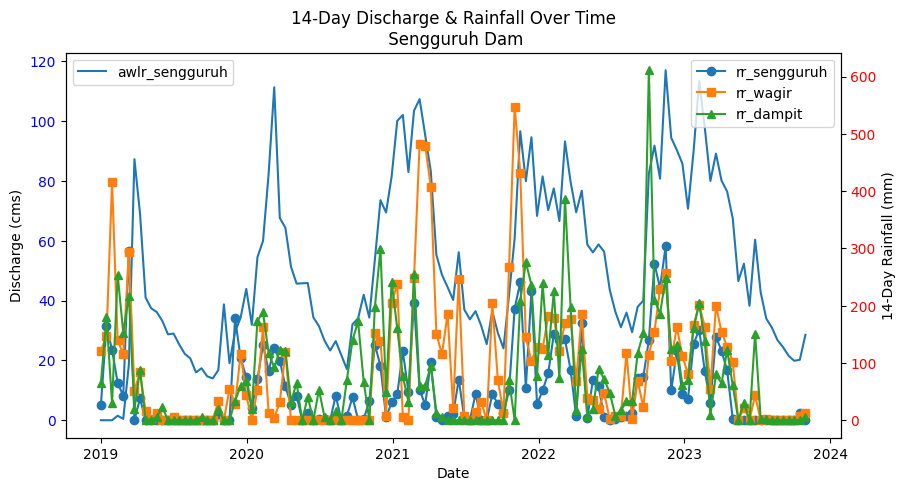

In [648]:
df_14d['awlr_sengguruh'] = df_14d['awlr_sengguruh'].interpolate()
df_14d['rr_sengguruh'] = df_14d['rr_sengguruh'].interpolate()
df_14d['rr_wagir'] = df_14d['rr_wagir'].interpolate()
df_14d['rr_dampit'] = df_14d['rr_dampit'].interpolate()

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(df_14d['date'], df_14d['awlr_sengguruh'],label='awlr_sengguruh')
ax1.set_xlabel('Date')
ax1.set_ylabel('Discharge (cms)')

ax1.tick_params(axis='y',labelcolor='blue')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(df_14d['date'], df_14d['rr_sengguruh'],label='rr_sengguruh',marker='o')
ax2.plot(df_14d['date'], df_14d['rr_wagir'],label='rr_wagir',marker='s')
ax2.plot(df_14d['date'], df_14d['rr_dampit'],label='rr_dampit',marker='^')
ax2.tick_params(axis='y',labelcolor='red')
ax2.set_ylabel('14-Day Rainfall (mm)')

plt.title('14-Day Discharge & Rainfall Over Time\n Sengguruh Dam')
plt.legend()
plt.show()

In [658]:
df_14d[45:120] #deteksi data yang mau diambil saja

,date,rr_sengguruh,rr_wagir,rr_dampit,awlr_sengguruh
90,2022-06-14,6.0,47.8,72.0,56.337857
91,2022-06-28,0.0,2.0,48.0,43.614545
92,2022-07-12,3.0,7.4,8.0,36.310714
93,2022-07-26,5.0,6.6,17.0,31.084615
94,2022-08-09,7.0,118.0,33.0,35.980714
95,2022-08-23,12.0,2.8,33.0,29.430000
96,2022-09-06,74.0,68.8,117.0,37.915000
97,2022-09-20,75.0,23.0,152.0,39.972143
98,2022-10-04,140.0,114.6,611.0,82.484545
99,2022-10-18,273.0,154.8,210.0,91.783571


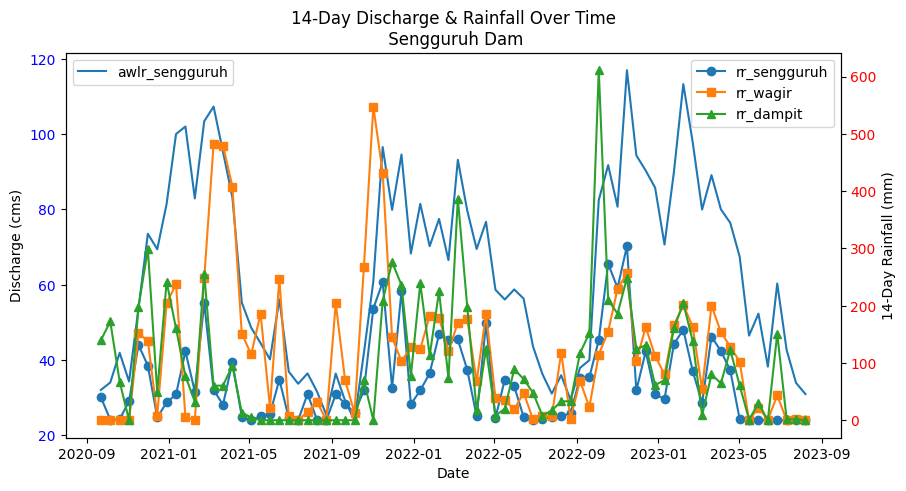

In [663]:
df_14d_after = df_14d[(df_14d['date'] >= '2020-09-22') & (df_14d['date'] <= '2023-08-08')]

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(df_14d_after['date'], df_14d_after['awlr_sengguruh'],label='awlr_sengguruh')
ax1.set_xlabel('Date')
ax1.set_ylabel('Discharge (cms)')

ax1.tick_params(axis='y',labelcolor='blue')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(df_14d_after['date'], df_14d_after['rr_sengguruh'],label='rr_sengguruh',marker='o')
ax2.plot(df_14d_after['date'], df_14d_after['rr_wagir'],label='rr_wagir',marker='s')
ax2.plot(df_14d_after['date'], df_14d_after['rr_dampit'],label='rr_dampit',marker='^')
ax2.tick_params(axis='y',labelcolor='red')
ax2.set_ylabel('14-Day Rainfall (mm)')

plt.title('14-Day Discharge & Rainfall Over Time\n Sengguruh Dam')
plt.legend()
plt.show()

# **Stage 3. EDA (Exploratory Data Analysis)**

In [664]:
df_eda = df_14d_after.drop(columns='date')
df_eda.describe()

,rr_sengguruh,rr_wagir,rr_dampit,awlr_sengguruh
count,76.000000,76.000000,76.000000,76.000000
mean,66.868421,119.427632,97.826316,63.780075
std,74.065258,124.056530,109.362742,25.106415
min,0.000000,0.000000,0.000000,24.027857
25%,5.000000,11.750000,7.200000,39.543929
50%,45.000000,107.900000,68.500000,63.702143
75%,105.750000,177.050000,154.050000,82.601981
max,304.000000,547.500000,611.000000,116.992857


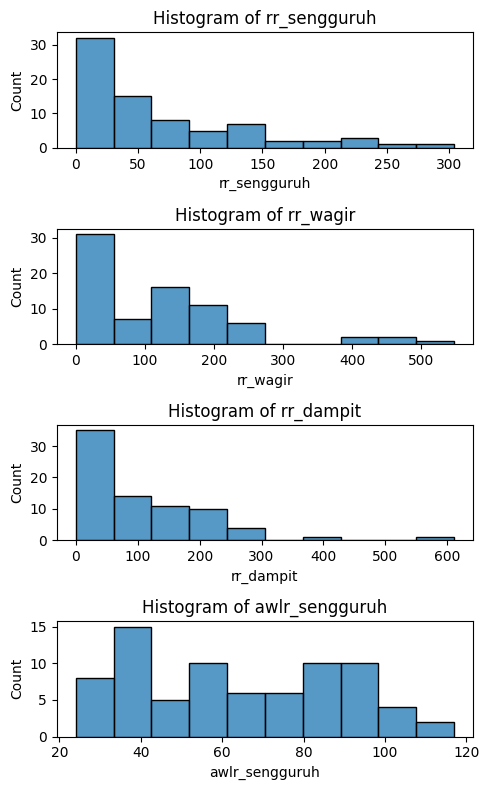

In [665]:
# Grafik Histogram tiap Variabel
num_features = len(df_eda.columns)
fig, axes = plt.subplots(nrows=num_features, figsize=(5, 2 * num_features))
for i, column in enumerate(df_eda.columns):
    sns.histplot(df_eda[column], bins=10, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")

plt.tight_layout()
plt.show()

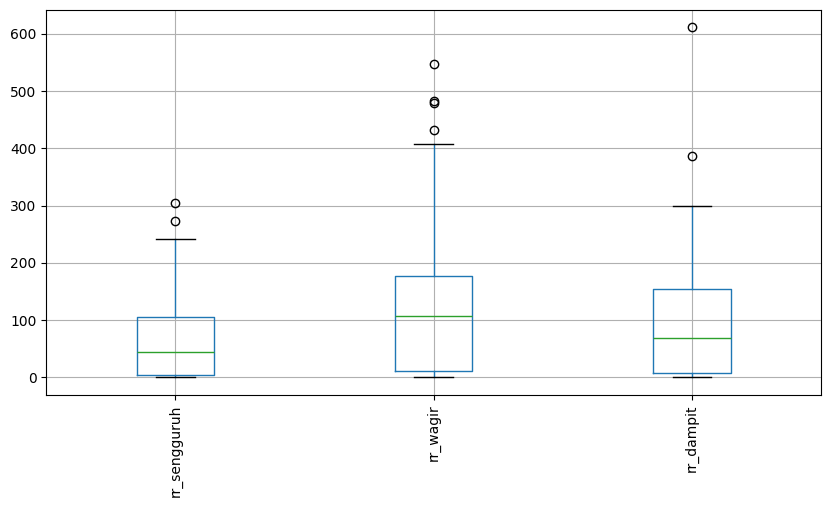

In [672]:
features = df_eda.drop(columns=['awlr_sengguruh'])
target = df_eda['awlr_sengguruh']
dates = df_14d_after['date']
plt.figure(figsize=(10,5))
features.boxplot(rot=90)
plt.show()

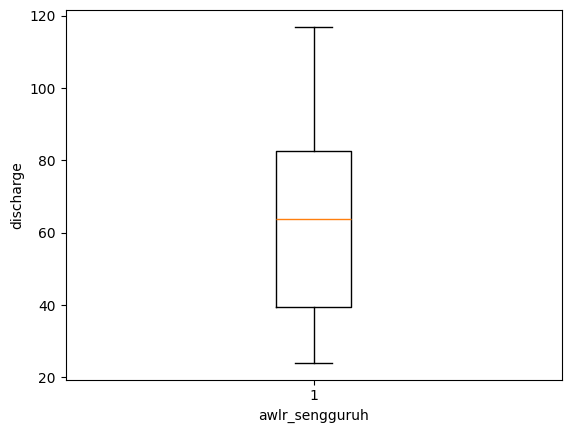

In [745]:
plt.boxplot(target)
plt.ylabel('discharge')
plt.xlabel('awlr_sengguruh')
plt.show()

# **Stage 4. Train Test Split & Modelling**

In [746]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [851]:
def tts (features,target,dt,a):
  x_train,x_test,y_train,y_test,date_train,date_test= train_test_split(features,target,dt,test_size=a,random_state=0,shuffle=False)
  return x_train,x_test,y_train,y_test,date_train,date_test

In [852]:
x_train,x_test,y_train,y_test,date_train,date_test = tts(features,target,dates,0.4)

In [853]:
def model (x_train,y_train,x_test):
  model = LinearRegression()
  model.fit(x_train,y_train)
  y_pred = np.round(model.predict(x_test),1)
  return y_pred

In [854]:
model_1 = model(x_train,y_train,x_test)

# **Stage 5. Evaluation** <br>
# Model 1 (Linear Regression)

In [855]:
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_percentage_error,mean_absolute_error

In [856]:
# Membuat fungsi untuk Evaluasi dengan Metriks Complete

def evaluation_metrics(y_test,y_pred):
  r2 = round(r2_score(y_test,y_pred),4)
  mae = round(mean_absolute_error(y_test,y_pred),4)
  rmse = round(root_mean_squared_error(y_test,y_pred),4)
  mape = round(mean_absolute_percentage_error(y_test,y_pred),4)*100
  return pd.DataFrame({
      'Metrics': ['R2', 'MAE', 'RMSE','MAPE'],
      'Value': [r2, mae, rmse,mape]})

In [857]:
def plot_scatter(y_test,y_pred):
  plt.figure(figsize=(5,4))
  plt.scatter(y_test,y_pred,color='blue',label='model',s=20,marker='o')
  min_val = min(y_test.min(), y_pred.min())
  max_val = max(y_test.max(), y_pred.max())
  plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='black', label='Ideal Line')

  plt.xlabel('Actual Discharge (cms)')
  plt.ylabel('Predicted Discharge (cms)')
  plt.title('Actual vs Predicted Discharge (cms)')
  plt.legend()
  return plt.show()

In [858]:
model_1_eval = evaluation_metrics(y_test,model_1)
model_1_eval

,Metrics,Value
0,R2,0.5255
1,MAE,14.8770
2,RMSE,17.9199
3,MAPE,23.8500


In [859]:
y_train.mean()

62.759006845006844

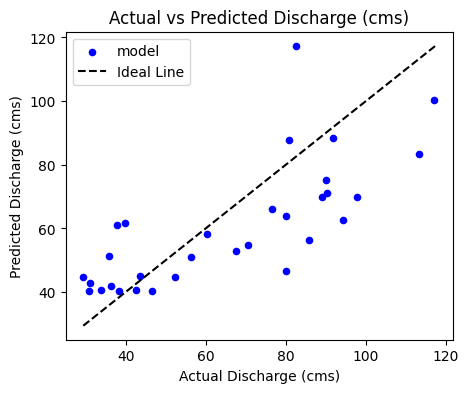

In [860]:
plot_scatter(y_test,model_1)

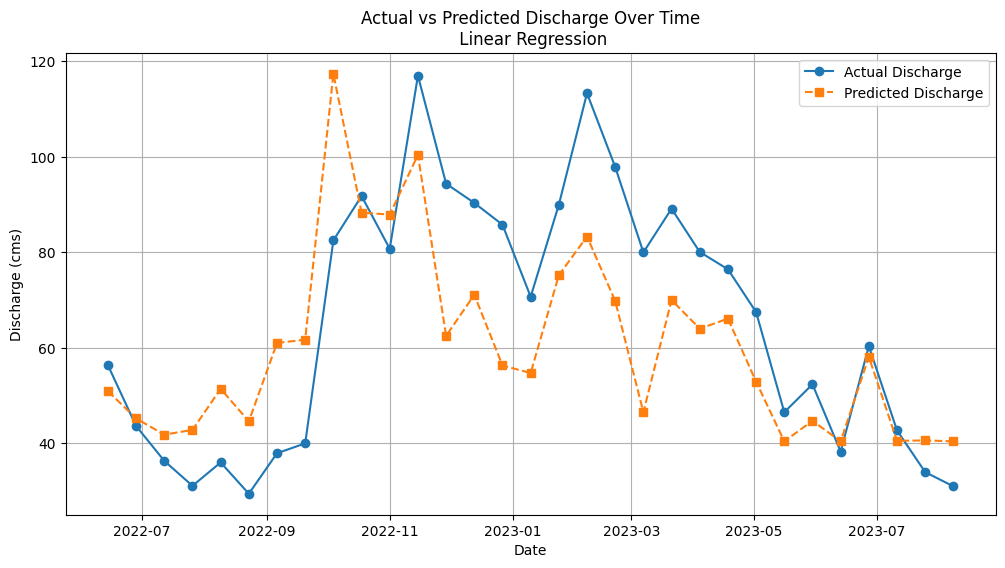

In [861]:
# Simpan hasil prediksi ke dataframe baru
df_result_LR = pd.DataFrame({
    'date': date_test,  # Tanggal dari data uji
    'Q_actual': y_test,
    'Q_predicted': model_1
})

# Pastikan dataframe diurutkan berdasarkan tanggal
df_result_LR = df_result_LR.sort_values(by='date')

plt.figure(figsize=(12, 6))
plt.plot(df_result_LR['date'], df_result_LR['Q_actual'], label='Actual Discharge', marker='o', linestyle='-')
plt.plot(df_result_LR['date'], df_result_LR['Q_predicted'], label='Predicted Discharge', marker='s', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Discharge (cms)')
plt.title('Actual vs Predicted Discharge Over Time\n Linear Regression')
plt.legend()
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

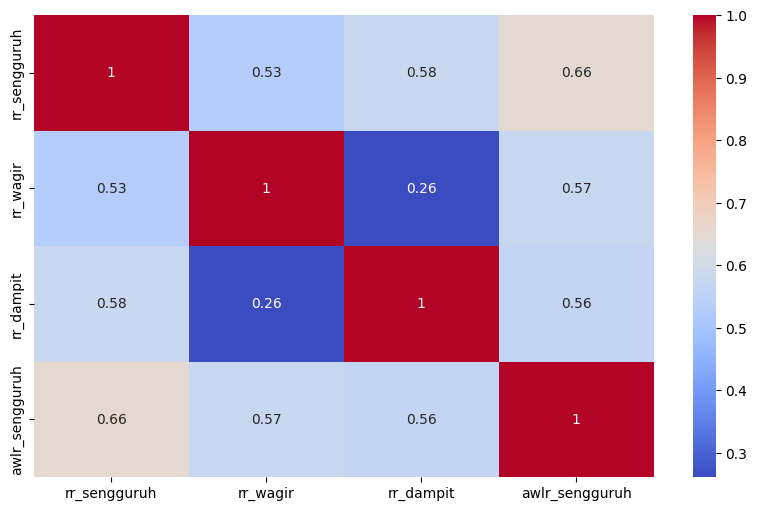

In [862]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_eda.corr(), annot=True, cmap="coolwarm")
plt.show()

In [863]:

# Melakukan perhitungan VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

def classify_vif (vif_score):
  if vif_score <= 1:
    return "No Multicollinearity"
  elif vif_score >= 4 and vif_score < 10:
    return "Moderate Multicollinearity"
  elif vif_score >= 10:
    return "High Multicollinearity"
  else :
    return "Low Multicollinearity"

def vif_score(x_train):
  x_vif = add_constant(x_train)
  vif_dataset = pd.DataFrame([vif(x_vif.values,i)
  for i in range (x_vif.shape[1])], index = x_vif.columns).reset_index()
  vif_dataset.columns = ['features','vif_score']
  vif_dataset = vif_dataset.loc[vif_dataset.features!='const']
  vif_dataset['vif_score']=vif_dataset['vif_score'].round(2)
  vif_dataset['vif_class']=vif_dataset['vif_score'].apply(classify_vif)
  return vif_dataset

vif_model_1 = vif_score(x_train)
vif_model_1

,features,vif_score,vif_class
1,rr_sengguruh,1.77,Low Multicollinearity
2,rr_wagir,1.30,Low Multicollinearity
3,rr_dampit,1.42,Low Multicollinearity


Tidak terdapat multicolinearity yang signifikan antar stasiun hujan.


# Model 2 : Random Forest Regressor



In [864]:
from sklearn.ensemble import RandomForestRegressor

model_2 = RandomForestRegressor()
model_2.fit(x_train,y_train)
y_pred_2 = np.round(model_2.predict(x_test),1)
y_pred_2

array([60. , 49.2, 45.5, 61.4, 65.8, 57.5, 65.9, 67.8, 83.6, 80.3, 88.6,
       94.6, 69.1, 71.1, 64.8, 61.5, 71.7, 78.6, 68.2, 54.3, 71.7, 66.2,
       67.3, 58.6, 29.4, 55. , 31.8, 56.2, 29.4, 31.8, 31.8])

In [865]:
model_2_eval = evaluation_metrics(y_test,y_pred_2)
model_2_eval

,Metrics,Value
0,R2,0.4857
1,MAE,15.6212
2,RMSE,18.6562
3,MAPE,28.1700


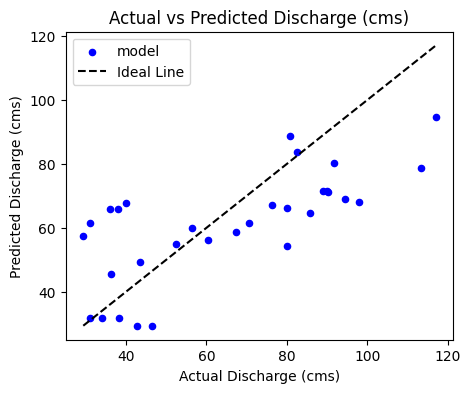

In [866]:
plot_scatter(y_test,y_pred_2)

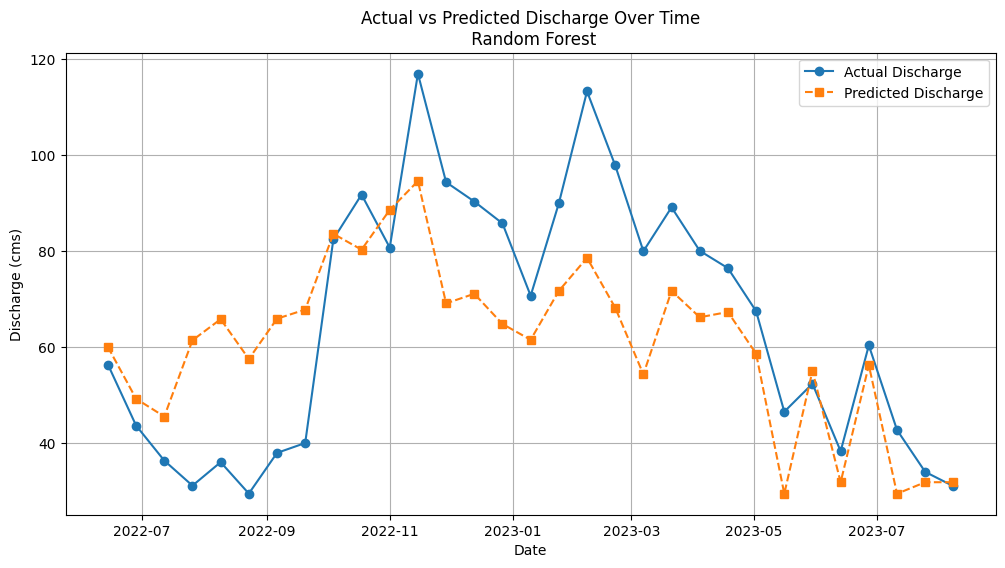

In [867]:
# Simpan hasil prediksi ke dataframe baru
df_result_RF = pd.DataFrame({
    'date': date_test,  # Tanggal dari data uji
    'Q_actual': y_test,
    'Q_predicted': y_pred_2
})

# Pastikan dataframe diurutkan berdasarkan tanggal
df_result_RF = df_result_RF.sort_values(by='date')

plt.figure(figsize=(12, 6))
plt.plot(df_result_RF['date'], df_result_RF['Q_actual'], label='Actual Discharge', marker='o', linestyle='-')
plt.plot(df_result_RF['date'], df_result_RF['Q_predicted'], label='Predicted Discharge', marker='s', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Discharge (cms)')
plt.title('Actual vs Predicted Discharge Over Time\n Random Forest')
plt.legend()
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Model 3 : Support Vector Regression (SVR)

In [868]:
from sklearn.svm import SVR
model_3 = SVR(kernel='linear')
model_3.fit(x_train,y_train)
y_pred_3 = np.round(model_3.predict(x_test),1)
y_pred_3

array([ 48.4,  41.9,  37.8,  38.9,  48.7,  41.1,  60.4,  61.4, 127.4,
        92.5,  91.6, 106.4,  62. ,  72. ,  54.5,  52.8,  76.8,  86.3,
        70.4,  43.1,  70.5,  63.6,  66.1,  50.6,  36.2,  41.2,  36.1,
        57.1,  36.3,  36.4,  36.1])

In [869]:
model_3_eval = evaluation_metrics(y_test,y_pred_3)
model_3_eval

,Metrics,Value
0,R2,0.4915
1,MAE,14.8990
2,RMSE,18.5514
3,MAPE,23.0700


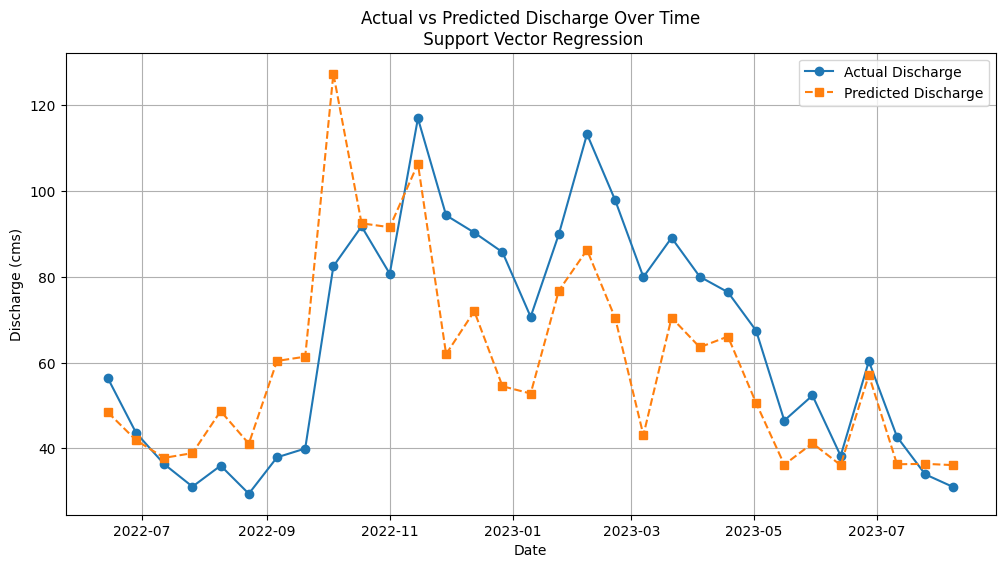

In [870]:
# Simpan hasil prediksi ke dataframe baru
df_result_SVR = pd.DataFrame({
    'date': date_test,  # Tanggal dari data uji
    'Q_actual': y_test,
    'Q_predicted': y_pred_3
})

# Pastikan dataframe diurutkan berdasarkan tanggal
df_result_SVR = df_result_SVR.sort_values(by='date')

plt.figure(figsize=(12, 6))
plt.plot(df_result_SVR['date'], df_result_SVR['Q_actual'], label='Actual Discharge', marker='o', linestyle='-')
plt.plot(df_result_SVR['date'], df_result_SVR['Q_predicted'], label='Predicted Discharge', marker='s', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Discharge (cms)')
plt.title('Actual vs Predicted Discharge Over Time\n Support Vector Regression')
plt.legend()
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

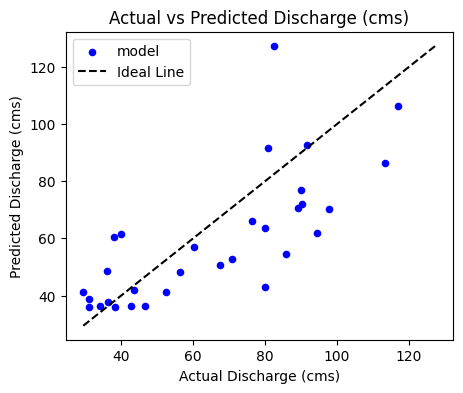

In [871]:
plot_scatter(y_test,y_pred_3)

# Model 4 : Polynomial Regression

In [872]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2

poly_model = make_pipeline(PolynomialFeatures(degree),LinearRegression())

poly_model.fit(x_train,y_train)
y_pred_4 = poly_model.predict(x_test)
y_pred_4

array([ 46.16689718,  41.50908167,  40.10657834,  41.01180794,
        46.53406988,  43.26542657,  60.00741112,  59.41420189,
        73.9871502 , 115.82624834,  95.93000067, 115.35723205,
        59.02587602,  70.90074384,  53.11312666,  51.61319509,
        74.77173071,  82.07586837,  67.53266747,  45.64258055,
        72.18722914,  67.19065972,  64.36004285,  48.84480594,
        39.11649863,  41.14782897,  39.05633297,  51.76812612,
        39.14667035,  39.13009225,  39.05442079])

In [873]:
model_4_eval = evaluation_metrics(y_test,y_pred_4)
model_4_eval

,Metrics,Value
0,R2,0.5261
1,MAE,14.9741
2,RMSE,17.9083
3,MAPE,23.5300


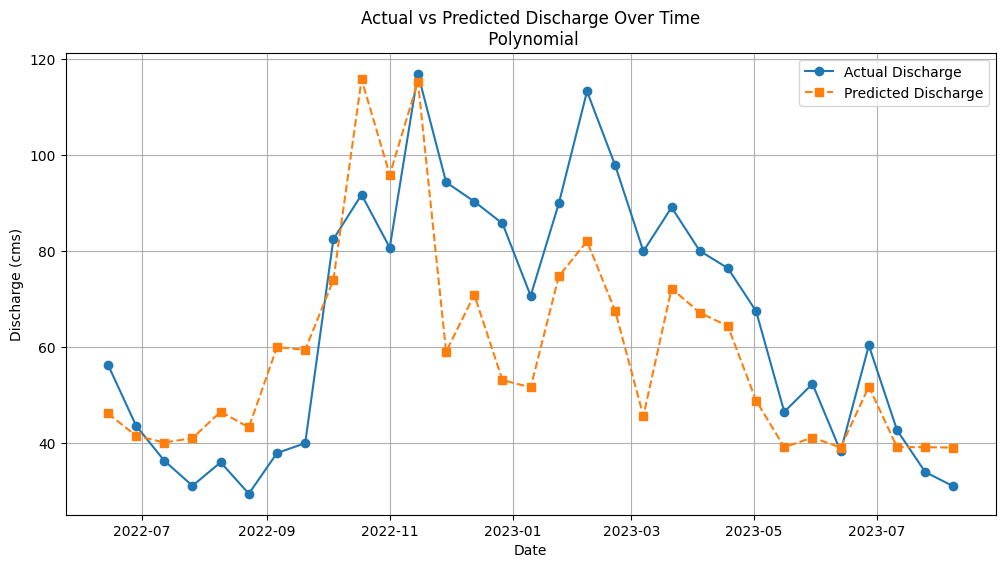

In [874]:
# Simpan hasil prediksi ke dataframe baru
df_result_poly = pd.DataFrame({
    'date': date_test,  # Tanggal dari data uji
    'Q_actual': y_test,
    'Q_predicted': y_pred_4
})

# Pastikan dataframe diurutkan berdasarkan tanggal
df_result_poly = df_result_poly.sort_values(by='date')

plt.figure(figsize=(12, 6))
plt.plot(df_result_poly['date'], df_result_poly['Q_actual'], label='Actual Discharge', marker='o', linestyle='-')
plt.plot(df_result_poly['date'], df_result_poly['Q_predicted'], label='Predicted Discharge', marker='s', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Discharge (cms)')
plt.title('Actual vs Predicted Discharge Over Time\n Polynomial')
plt.legend()
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

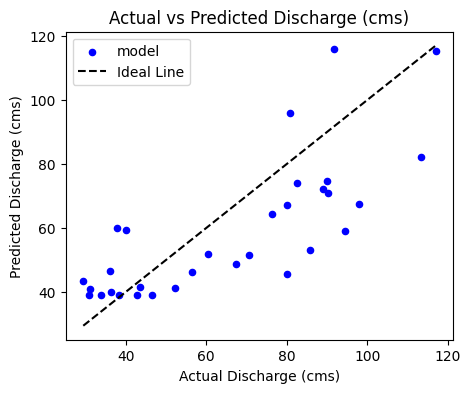

In [875]:
plot_scatter(y_test,y_pred_4)


# Comparison Between Models

In [876]:
model_1 = model_1_eval.set_index("Metrics").T
model_2 = model_2_eval.set_index("Metrics").T
model_3 = model_3_eval.set_index("Metrics").T
model_4 = model_4_eval.set_index("Metrics").T

model_1.index = ["Linear Regression"]
model_2.index = ["Random Forest Regression"]
model_3.index = ["Support Vector Regression (Linear)"]
model_4.index = ["Polynomial Regression"]

Combined = pd.concat([model_1,model_2,model_3,model_4])
Combined

Metrics,R2,MAE,RMSE,MAPE
Linear Regression,0.5255,14.8770,17.9199,23.85
Random Forest Regression,0.4857,15.6212,18.6562,28.17
Support Vector Regression (Linear),0.4915,14.8990,18.5514,23.07
Polynomial Regression,0.5261,14.9741,17.9083,23.53
